In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
dataset=pd.read_excel('DataSet1.xlsx' )

In [2]:
dataset.info

<bound method DataFrame.info of      Transaction date  House Age  Distance from nearest Metro station (km)  \
0         2012.916667       32.0                                  84.87882   
1         2012.916667       19.5                                 306.59470   
2         2013.583333       13.3                                 561.98450   
3         2013.500000       13.3                                 561.98450   
4         2012.833333        5.0                                 390.56840   
..                ...        ...                                       ...   
409       2013.000000       13.7                                4082.01500   
410       2012.666667        5.6                                  90.45606   
411       2013.250000       18.8                                 390.96960   
412       2013.000000        8.1                                 104.81010   
413       2013.500000        6.5                                  90.45606   

     Number of convenience stor

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
dataset.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,1.988,931.476,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,0.819,348.910,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,1.000,402.000,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,1.000,548.000,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,2.000,975.000,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,3.000,1234.750,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,3.000,1500.000,117.500


In [4]:
dataset.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

<AxesSubplot:>

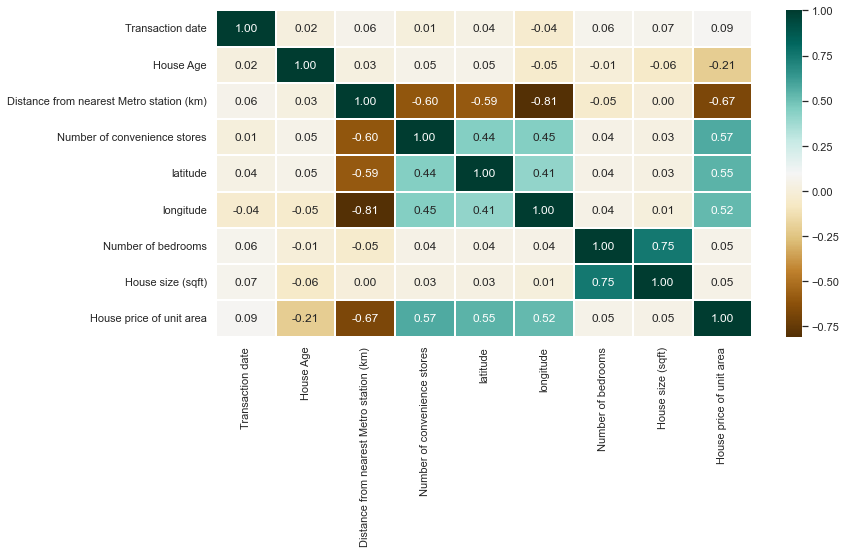

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [10]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 0
Integer variables: 0
Float variables: 6


In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = dataset.drop(['House price of unit area'], axis=1)
Y = dataset['House price of unit area']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

In [13]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.19952337323280223


In [14]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.13782669618745433

In [15]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.17012009837424566
